<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Time Series Analysis</h1>
        <h1>Stationarity and Trend</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import watermark

%matplotlib inline
%load_ext watermark

List out the versions of all loaded libraries

In [2]:
%watermark -n -v -m -g -iv

pandas    1.0.1
autopep8  1.5
json      2.0.9
numpy     1.18.1
watermark 2.0.2
Tue Mar 03 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : e9953424c2f06ff0260f07f5a62a740e57c70a5b


Set the default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Non-stationarity

There are several kinds of non-stationarity. Here we illustrate the most common ones with simple toy examples

In [4]:
x = np.linspace(0, np.pi*10, 360)
y = np.sin(x)

We can generate the differnet kinds with a few simple algebraic manipulations

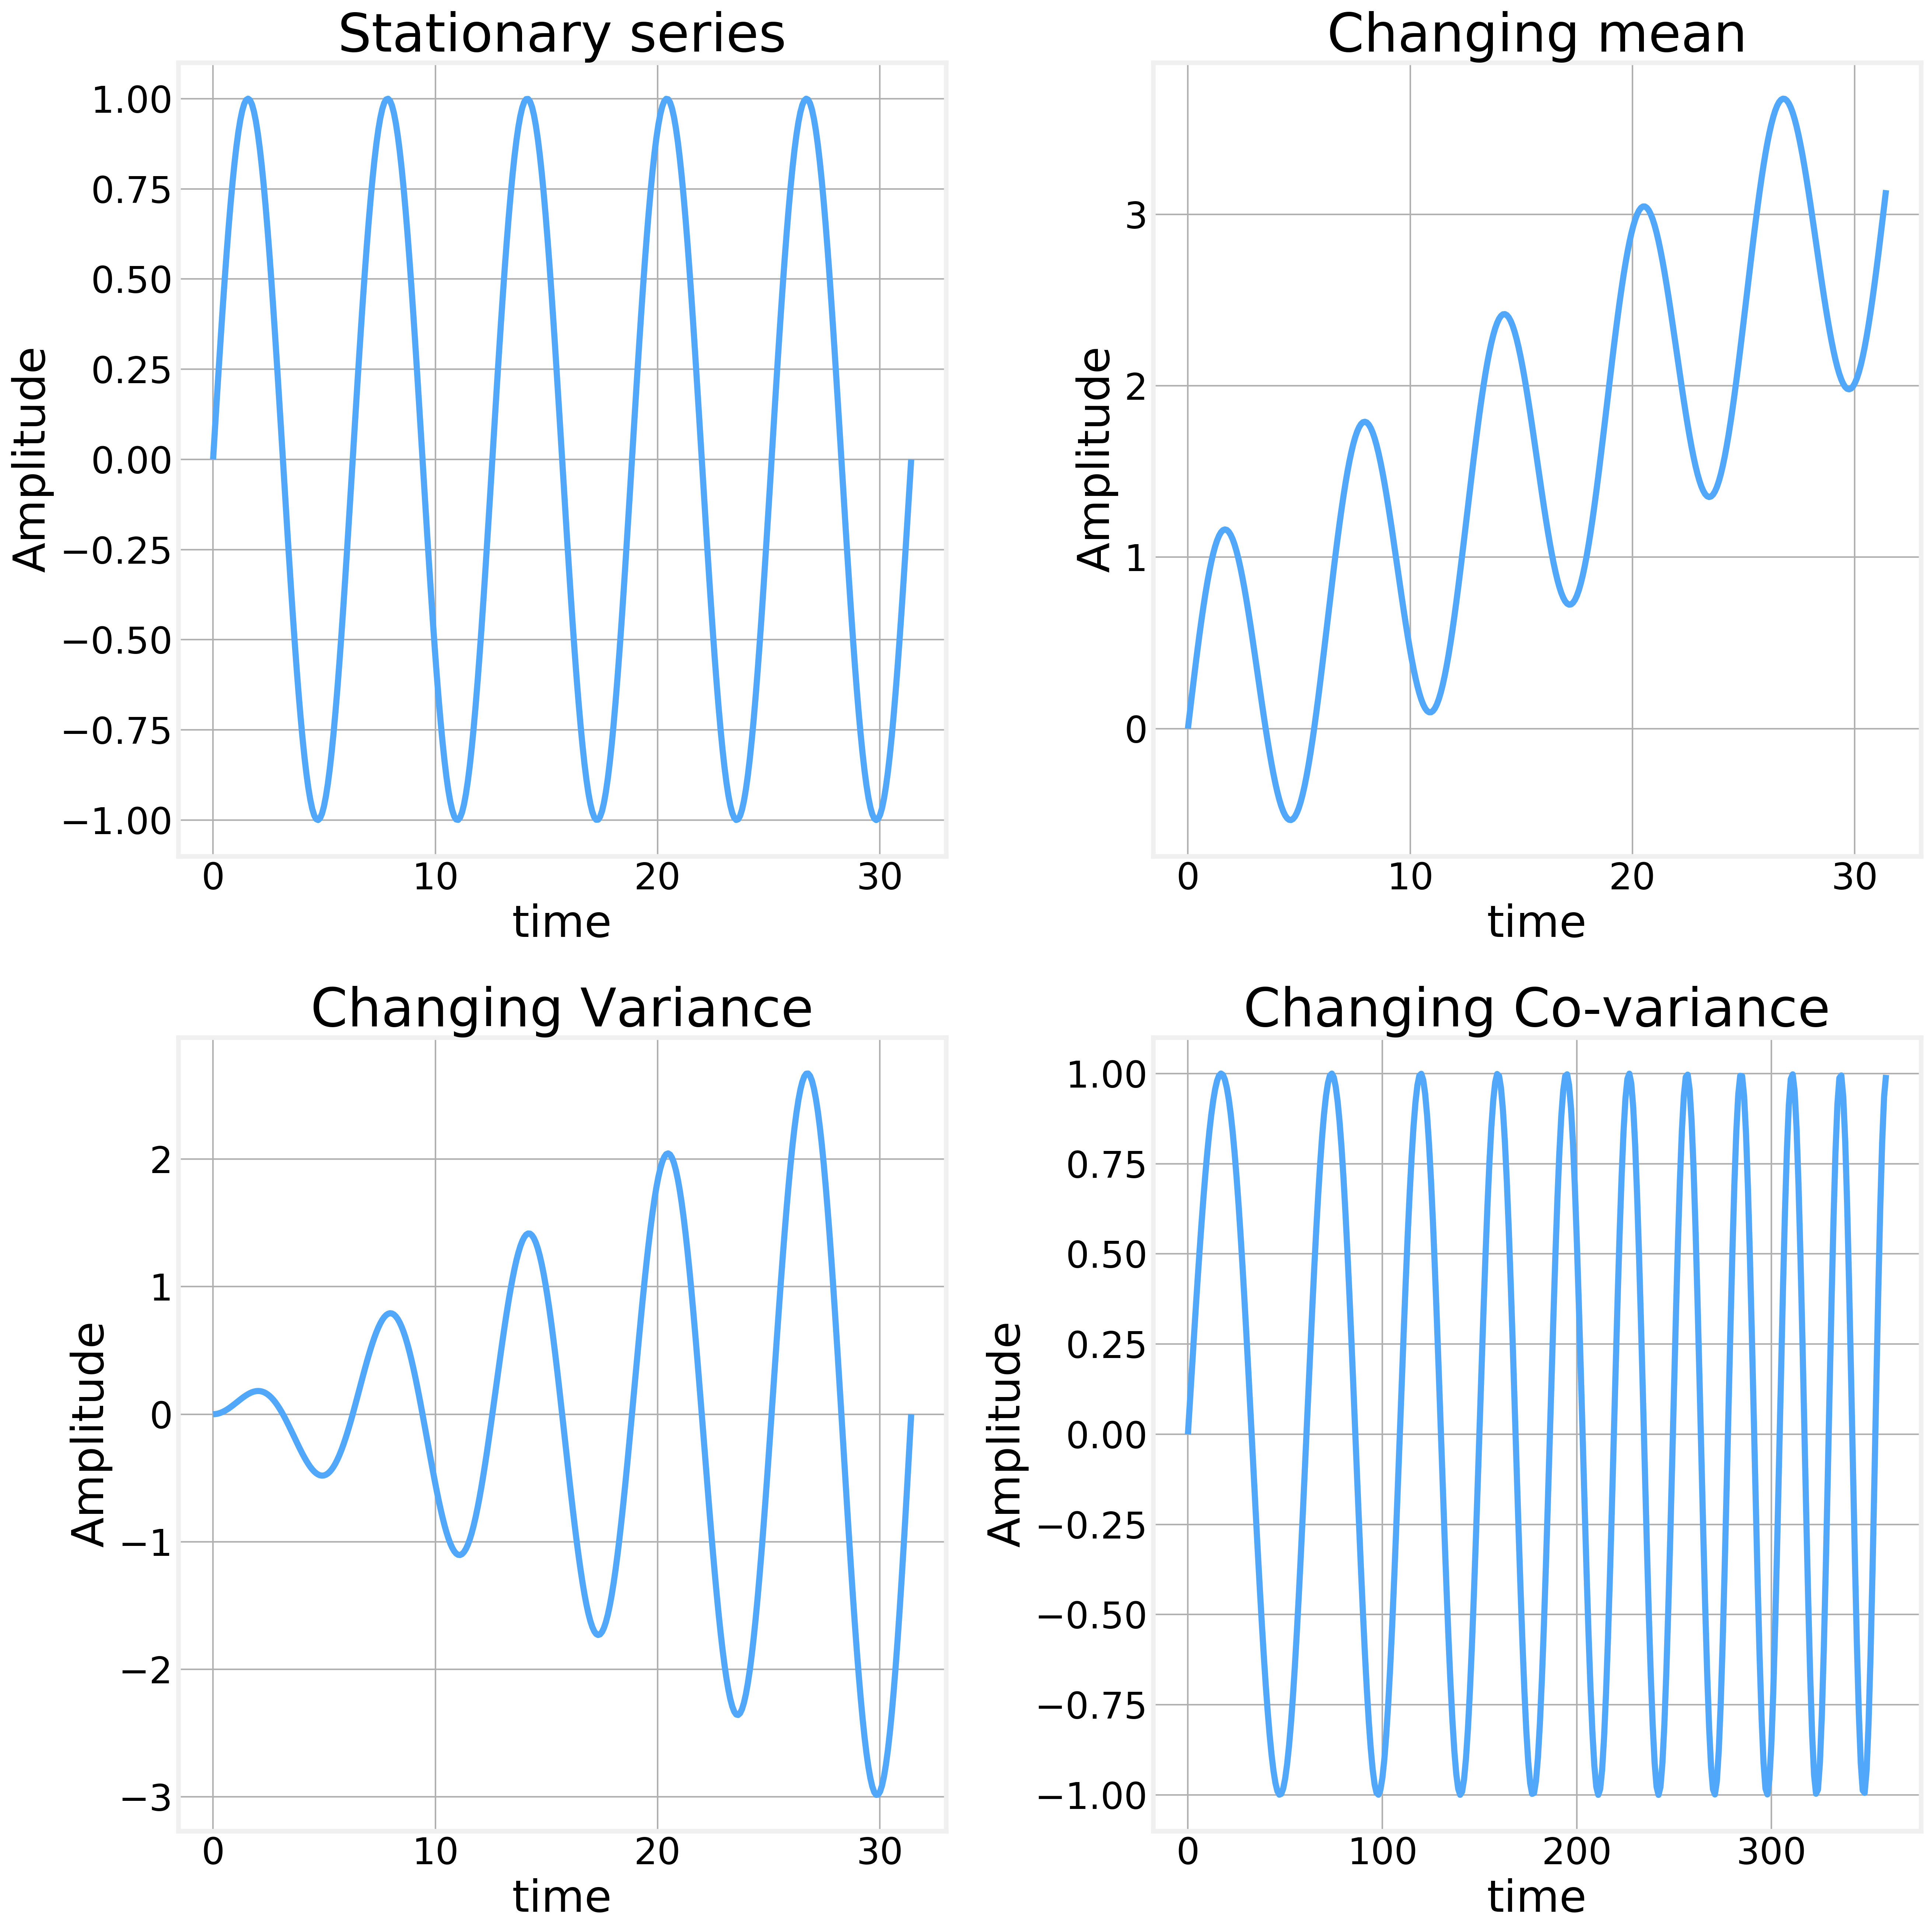

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
axs[0][0].plot(x, y)
axs[0][0].set_title('Stationary series')
axs[0][0].set_xlabel('time')
axs[0][0].set_ylabel('Amplitude')

axs[0][1].plot(x, y+x/10)
axs[0][1].set_title('Changing mean')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('Amplitude')


axs[1][0].plot(x, y*x/10)
axs[1][0].set_title('Changing Variance')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('Amplitude')

axs[1][1].plot(np.sin(x+x*x/30))
axs[1][1].set_title('Changing Co-variance')
axs[1][1].set_xlabel('time')
axs[1][1].set_ylabel('Amplitude')

plt.tight_layout()

## Trend

Two of the most common non-stationarity types are due to differnet kinds of trends that we illustrate here

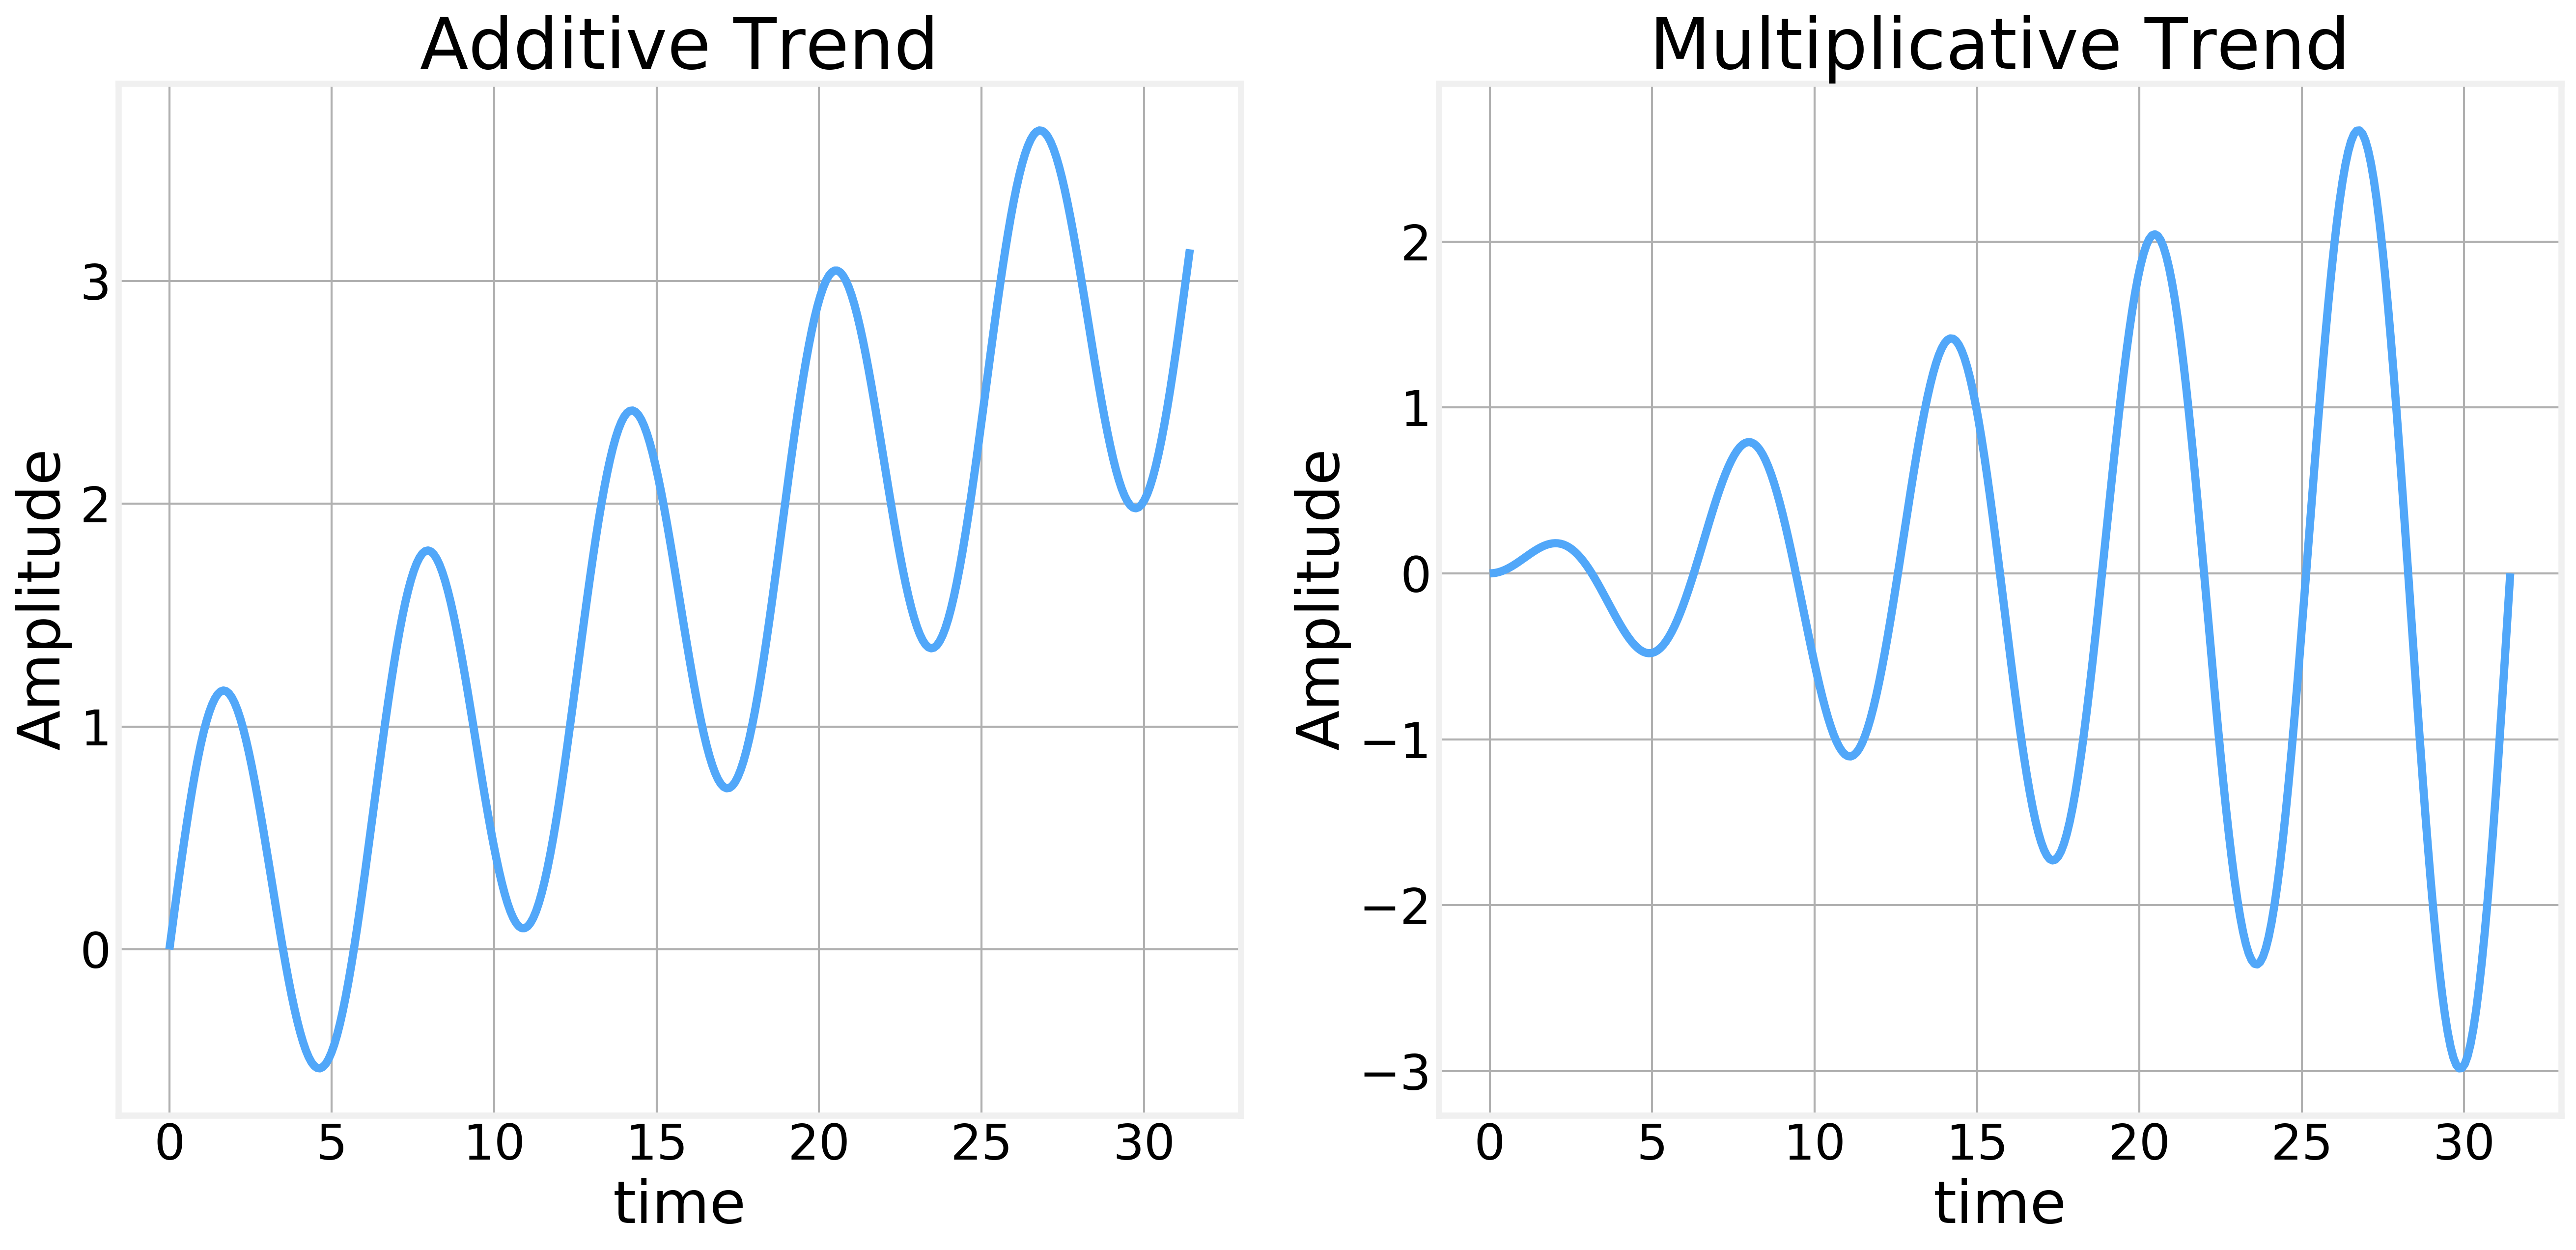

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].plot(x, y+x/10)
axs[0].set_title('Additive Trend')
axs[0].set_xlabel('time')
axs[0].set_ylabel('Amplitude')


axs[1].plot(x, y*x/10)
axs[1].set_title('Multiplicative Trend')
axs[1].set_xlabel('time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()

## Empirical time series

We also saw several examples of non-stationary time series. A good example is the International Airline Passengers dataset

Text(0, 0.5, 'Passengers')

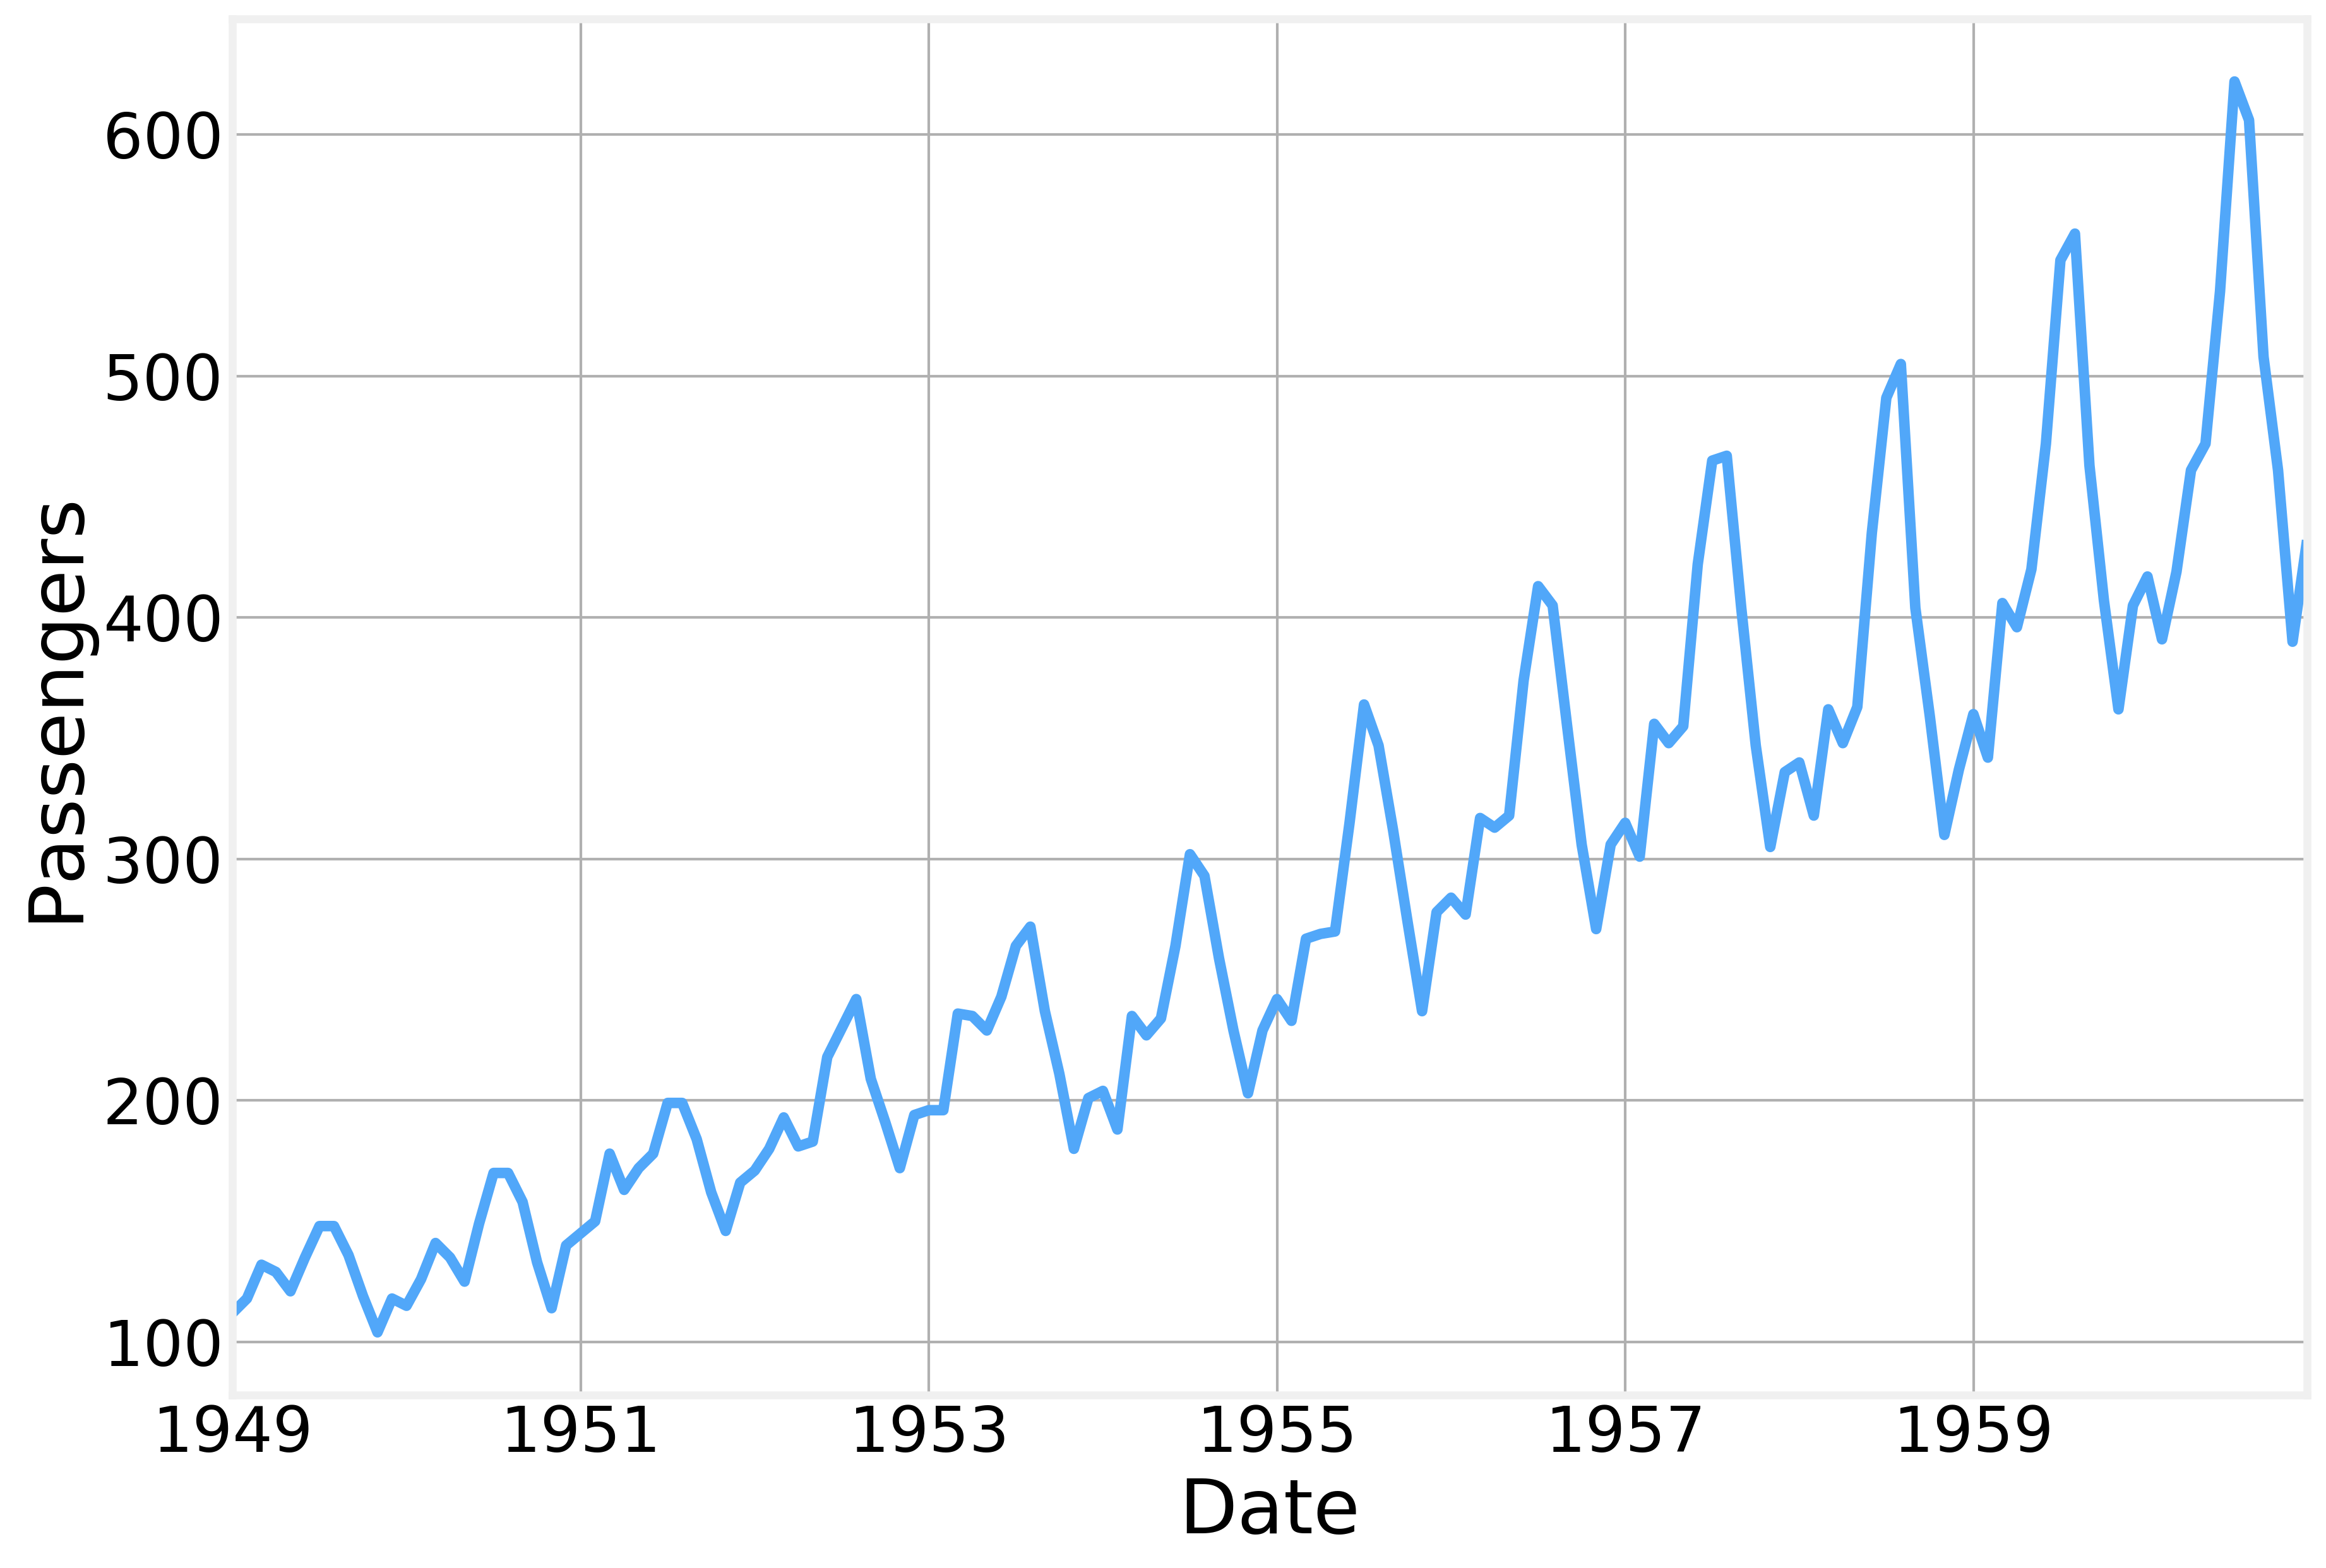

In [7]:
airline = pd.read_csv('data/international-airline-passengers.csv', parse_dates=['Month'], sep=';')
airline.set_index('Month', inplace=True)
ax = airline.plot(legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')

This time series is obiously trending. One quick and dirty way to verify this is to look at the average number of passengers per year

In [8]:
airline['Year'] = airline.index.year

Text(0, 0.5, '$\\langle Passengers\\rangle$')

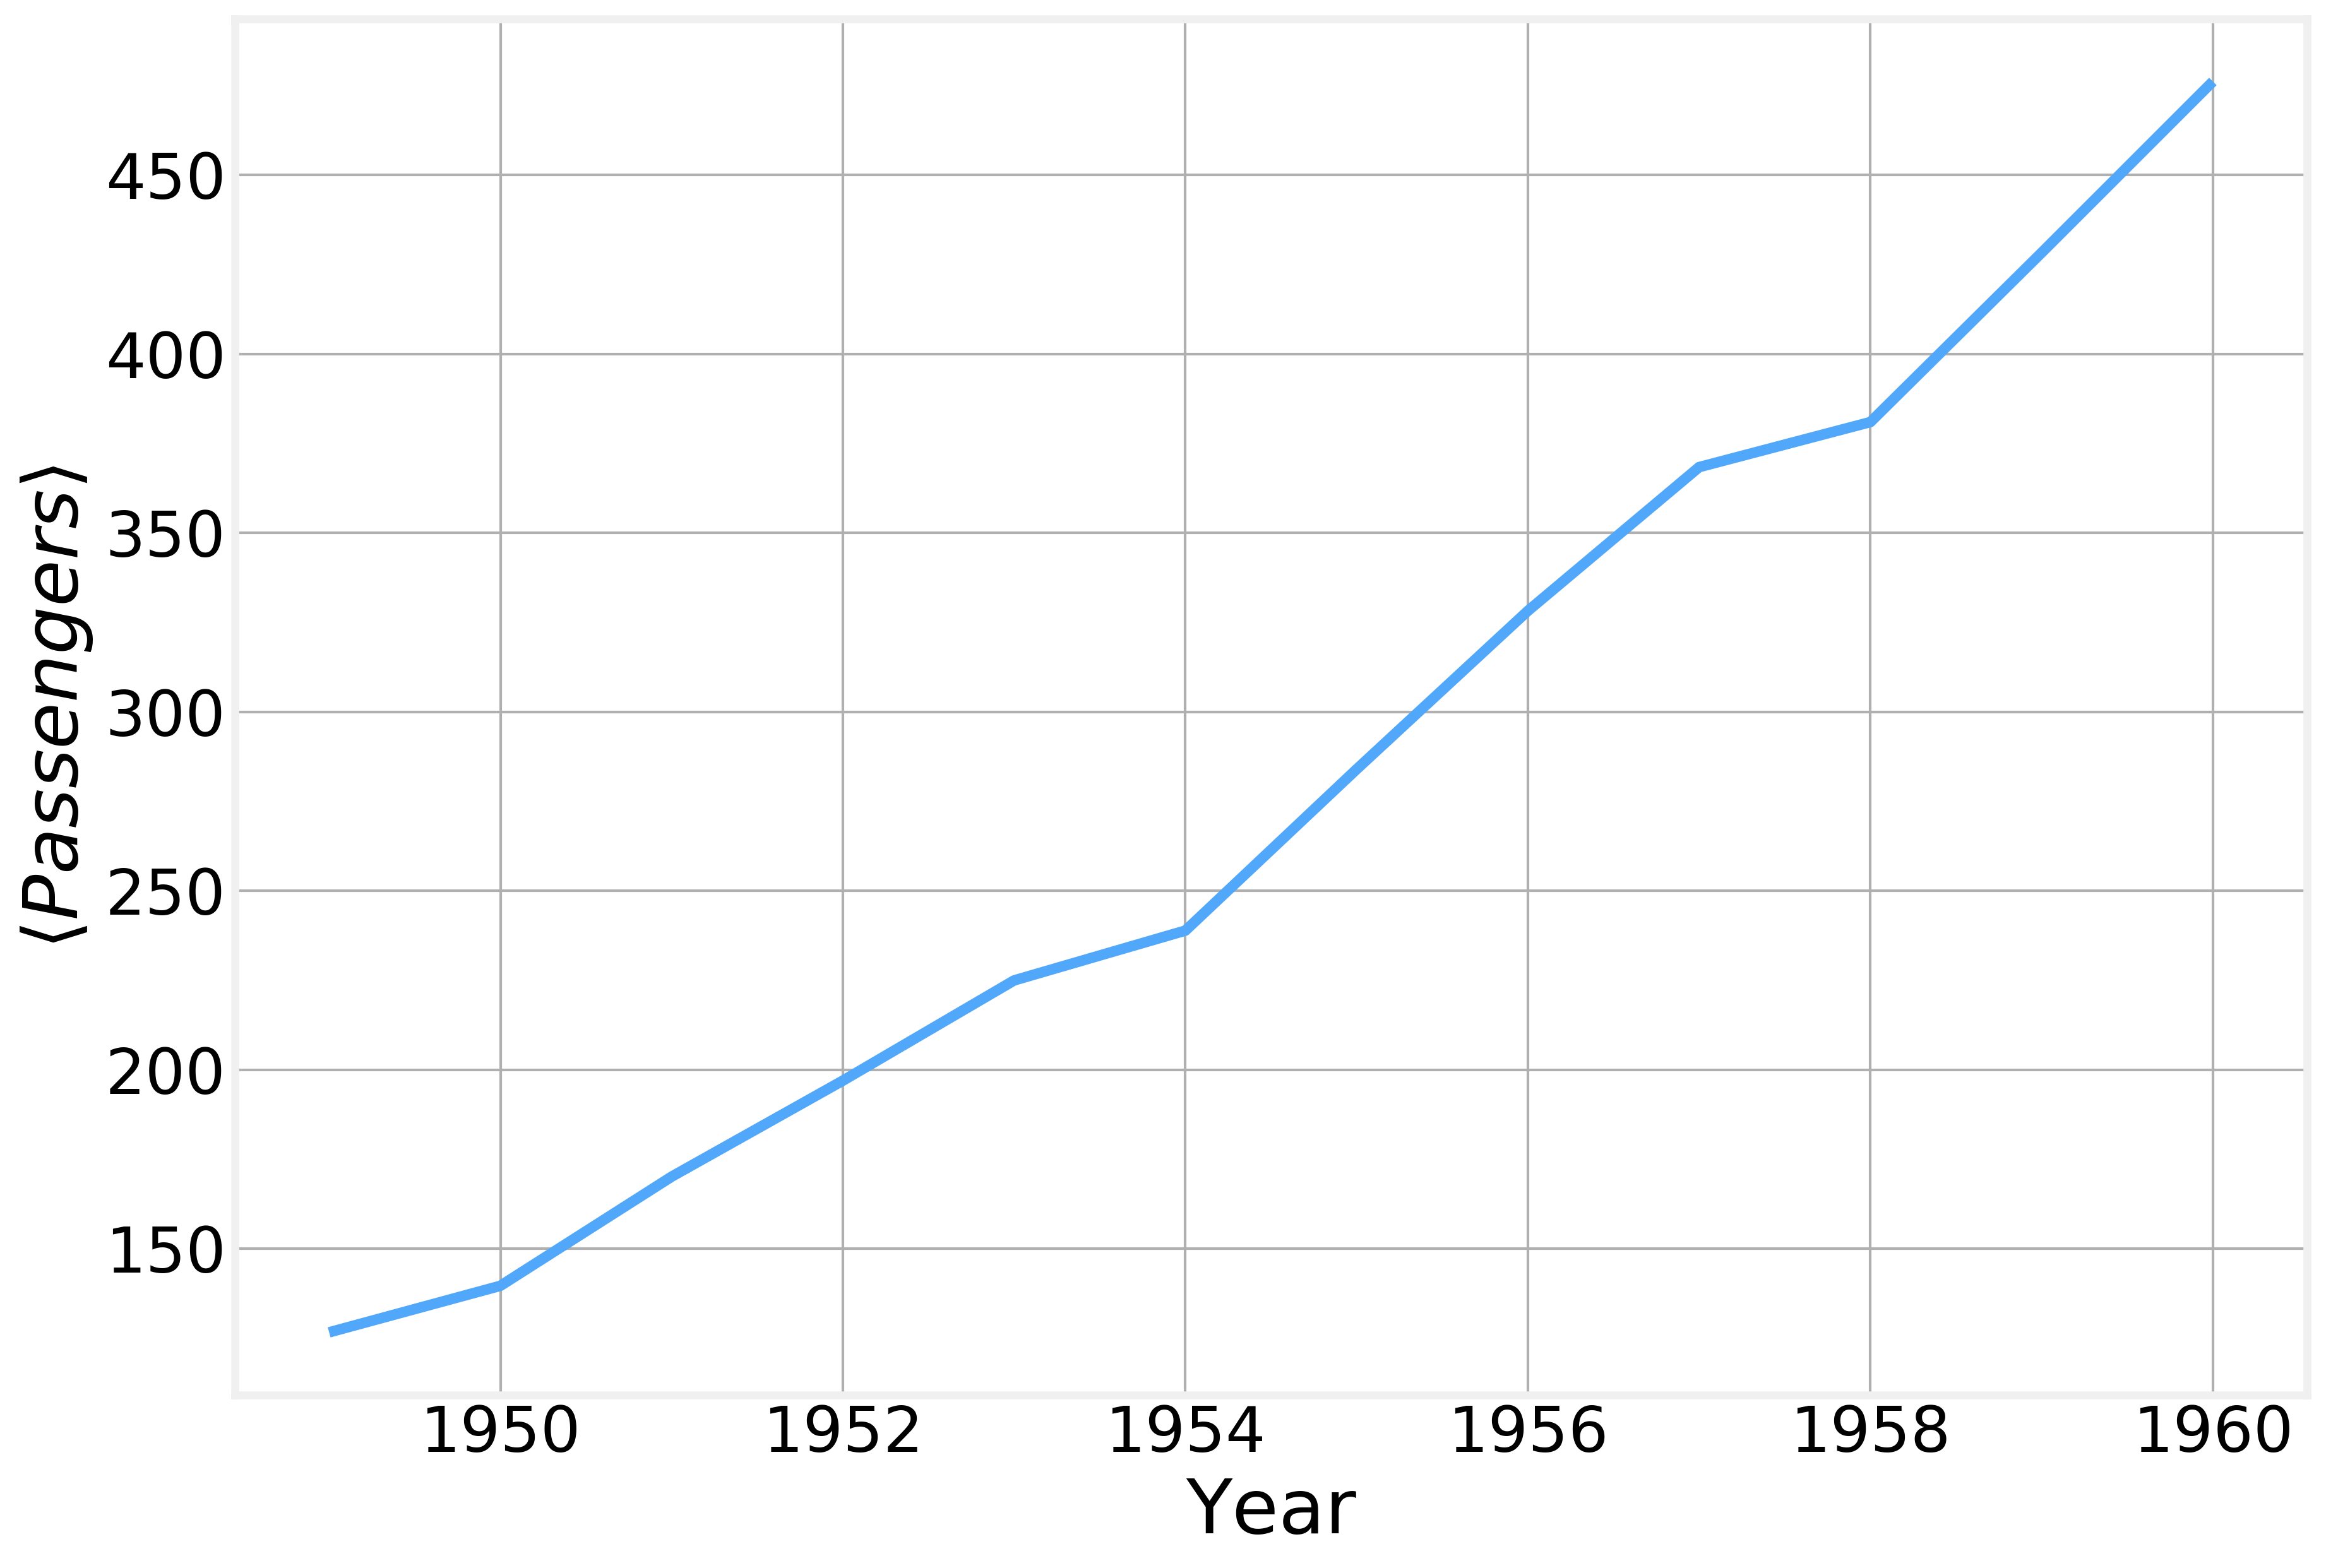

In [9]:
ax = airline[['Year', 'Passengers']].groupby('Year').mean().plot(legend=False)
ax.set_ylabel(r'$\langle Passengers\rangle$')

Which clearly indicates that we have a growing mean value, one of the kinds of non-stationarity we described above

### Exercise
Calculate also the range (max-min) of the values for each year and plot them as s function of the year.

You can use the 'yerr' parameter to plot() to add error bars to the plot above

In [10]:
# %load solutions/airline_trend.py

As the variance (as measured by the range of values each year) is also increasing, we suspect that we have a multilicative trend

### Exercise

Analyze the trending behavior of the ILI dataset

In [11]:
# %load solutions/ILI_trend.py

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>